In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

In [2]:
df = pd.read_csv('/kaggle/input/dataset/train.csv')

In [3]:
'''
Таргет: loan_status – Статус кредита (0 – нет дефолта, 1 – дефолт)

person_age – Возраст
person_income – Годовой доход
person_home_ownership – Владение жильем
person_emp_length – Стаж работы (в годах)
loan_intent – Цель кредита
loan_grade – Кредитный рейтинг
loan_amnt – Сумма кредита
loan_int_rate – Процентная ставка
loan_percent_income – Доля дохода, выделяемая на кредит
cb_person_default_on_file – Наличие дефолта в истории
cb_preson_cred_hist_length – Длина кредитной истории
'''

'\nТаргет: loan_status – Статус кредита (0 – нет дефолта, 1 – дефолт)\n\nperson_age – Возраст\nperson_income – Годовой доход\nperson_home_ownership – Владение жильем\nperson_emp_length – Стаж работы (в годах)\nloan_intent – Цель кредита\nloan_grade – Кредитный рейтинг\nloan_amnt – Сумма кредита\nloan_int_rate – Процентная ставка\nloan_percent_income – Доля дохода, выделяемая на кредит\ncb_person_default_on_file – Наличие дефолта в истории\ncb_preson_cred_hist_length – Длина кредитной истории\n'

In [4]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [10]:
df_num = df.select_dtypes(include='number').drop(columns=['id', 'loan_status'], axis=1)

In [11]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_emp_length           58645 non-null  float64
 3   loan_amnt                   58645 non-null  int64  
 4   loan_int_rate               58645 non-null  float64
 5   loan_percent_income         58645 non-null  float64
 6   cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.1 MB


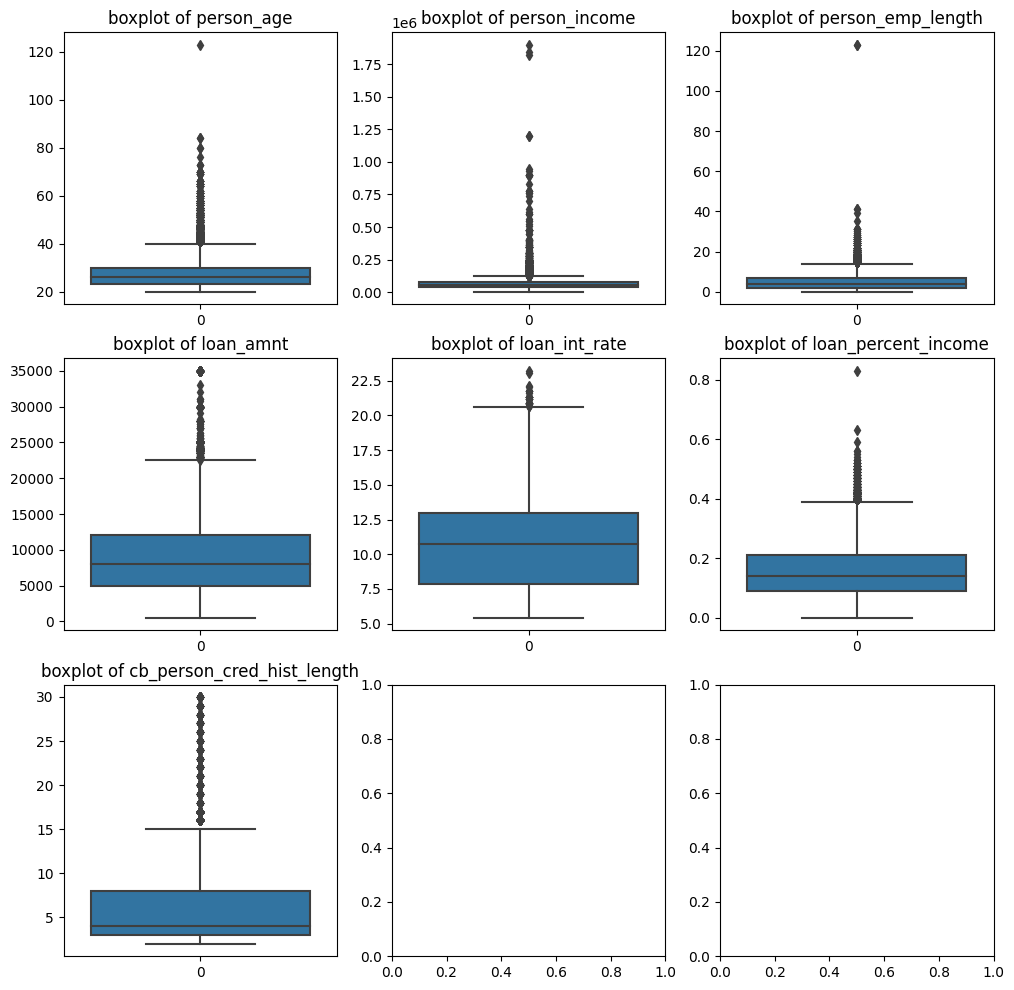

In [800]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.rc('font', size=10)
for i in range(3):
    for j in range(3):
        if i*3 + (j+1) > len(df_num.columns):
            break
        column = df_num.columns[i*3 + j]
        sns.boxplot(df_num[column], ax=ax[i, j])
        ax[i, j].set_title(f'boxplot of {df_num.columns[i*3 + j]}')
plt.savefig('boxplots.png')

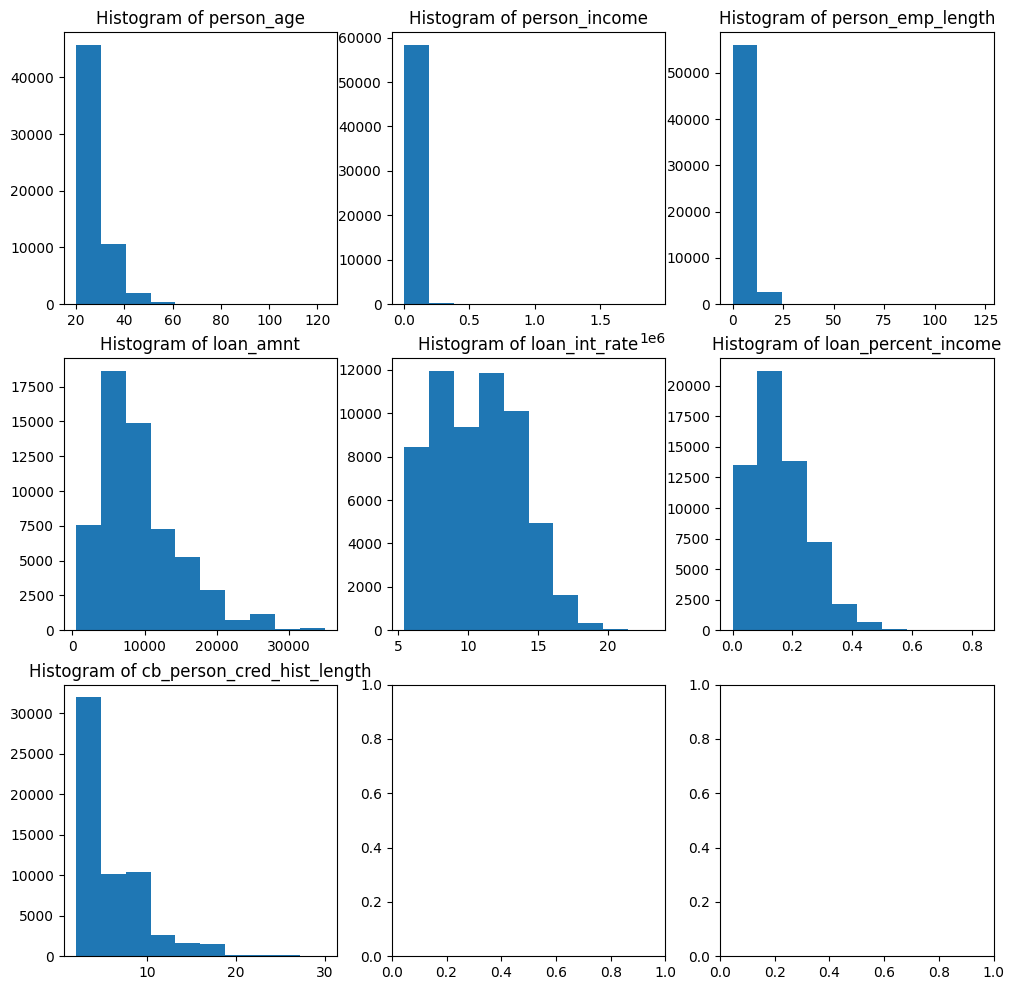

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        if i*3 + (j+1) > len(df_num.columns):
            break
        column = df_num.columns[i*3 + j]
        ax[i, j].hist(df_num[column])
        ax[i, j].set_title(f'Histogram of {df_num.columns[i*3 + j]}')
plt.savefig('hists1.png')

In [14]:
df_cat = df.select_dtypes(include='object')
df_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


In [15]:
df_cat.nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [16]:
ohe = OneHotEncoder()
codes = ohe.fit_transform(df_cat).toarray()
feature_names = ohe.get_feature_names_out(df_cat.columns)
df_cat = pd.DataFrame(codes, columns=feature_names)
df_cat

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
58642,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
data = pd.concat([df['loan_status'], df_num, df_cat], axis=1)

<Axes: >

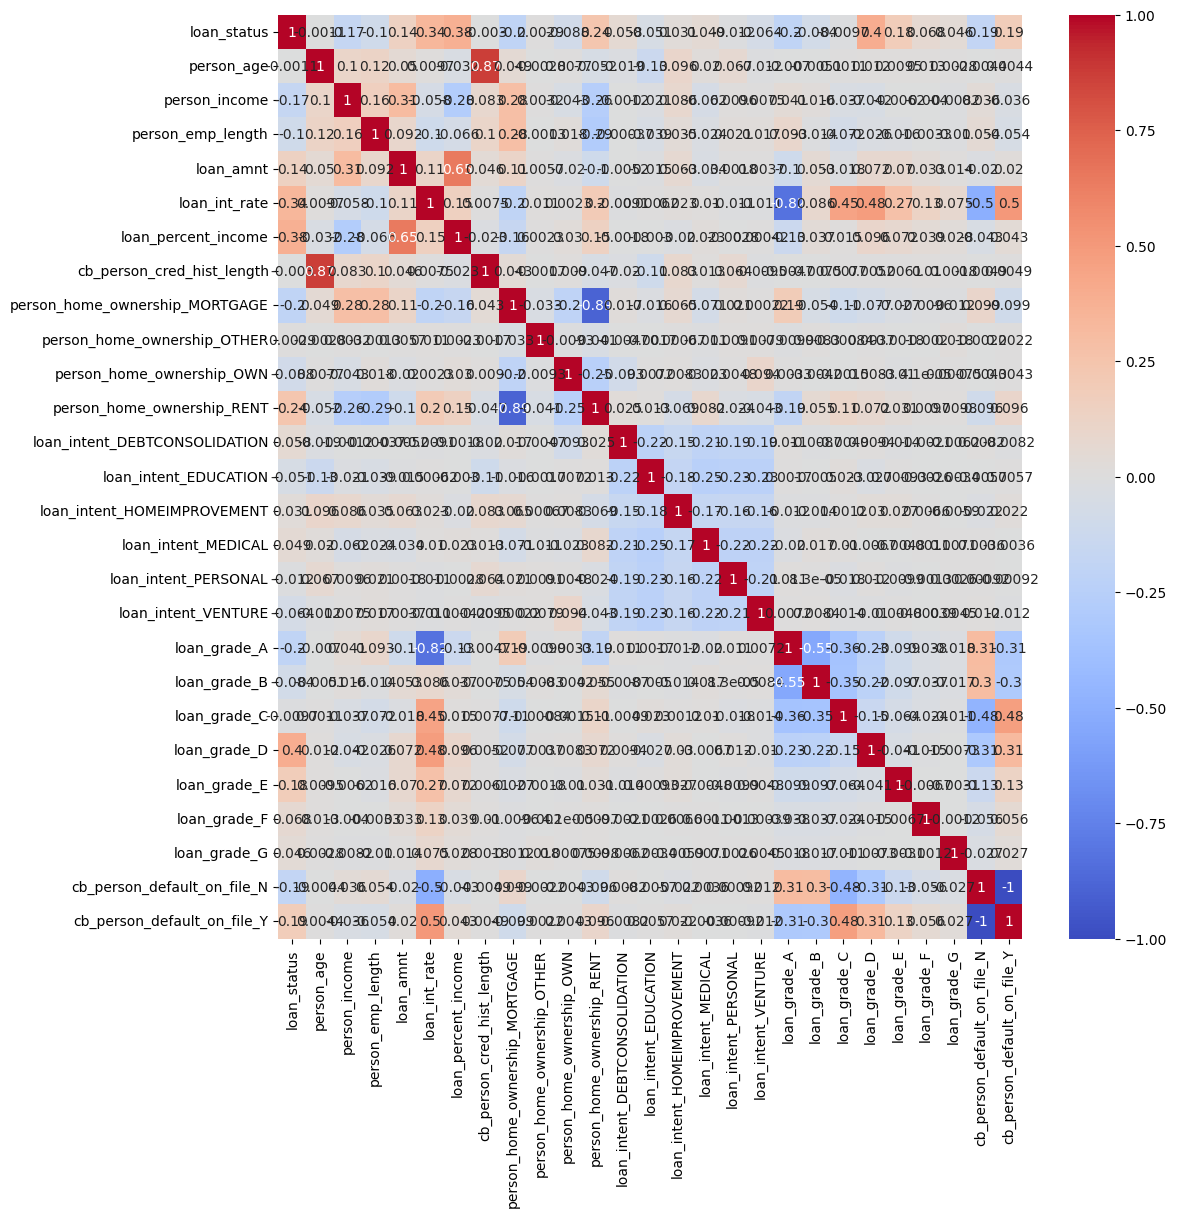

In [18]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm', fmt='.2g')

In [19]:

data = data.drop(columns=['cb_person_cred_hist_length'], axis=1)
data = data.drop(columns=['loan_grade_A'], axis=1)
data = data.drop(columns=['person_home_ownership_MORTGAGE'], axis=1)

data = data.drop(columns=['cb_person_default_on_file_N'], axis=1)


In [20]:
data = data.drop(data[data['person_age'] > 100].index, axis=0)
df = df.drop(df[df['person_age'] > 100].index, axis=0)

In [21]:
data = data.drop(data[data['person_emp_length'] > 80].index, axis=0)
df = df.drop(df[df['person_emp_length'] > 80].index, axis=0)

In [22]:
ids = df['id']

<Axes: >

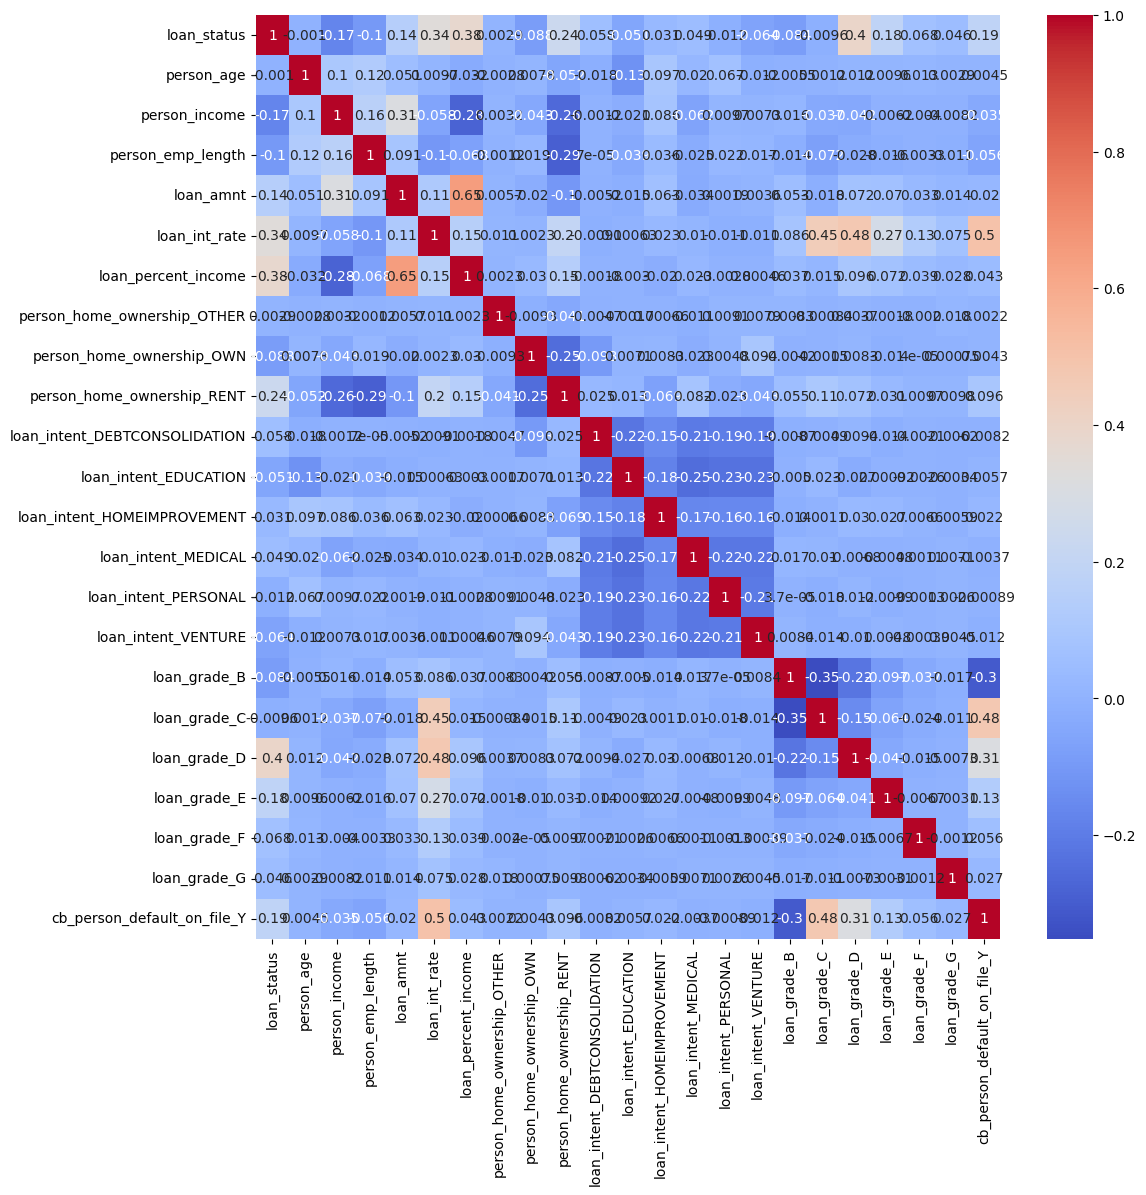

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm', fmt='.2g')

(array([50293.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  8349.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

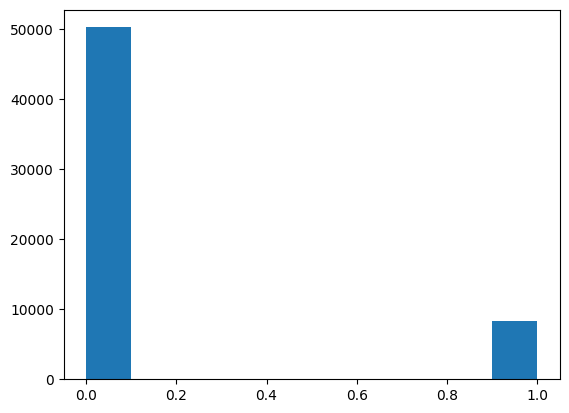

In [24]:
plt.hist(data['loan_status'])

In [25]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

smote = SMOTE(random_state=42)
X, y, = smote.fit_resample(X, y)



<Axes: >

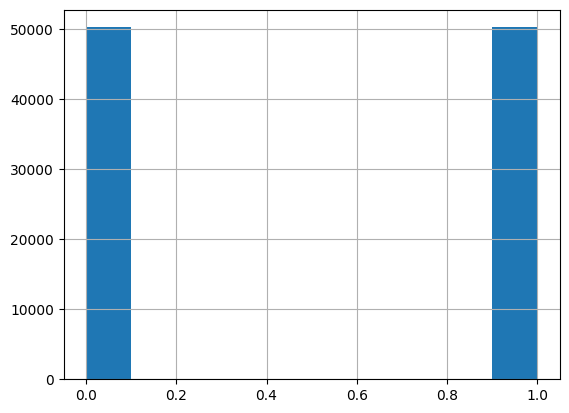

In [26]:
y.hist()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [29]:
X_train_tensor = torch.tensor(X_train.tolist())
y_train_tensor = torch.tensor(y_train.tolist())

X_val_tensor = torch.tensor(X_val.tolist())
y_val_tensor = torch.tensor(y_val.tolist())

X_test_tensor = torch.tensor(X_test.tolist())
y_test_tensor = torch.tensor(y_test.tolist())

In [30]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)

val_data = TensorDataset(X_val_tensor, y_val_tensor)

test_data = TensorDataset(X_test_tensor, y_test_tensor)

In [31]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [768]:
class MLP(nn.Module):
    def __init__(self, hidden_size, p):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(22, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.d1 = nn.Dropout(p)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.d2 = nn.Dropout(p)

        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)
        self.d3 = nn.Dropout(p)

        self.fc4 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.d1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.d2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.d3(x)
        
        x = self.fc4(x)

        return x

    def train_and_test_model(self, loader, criterion, optimizer, n_epochs, threshold=0.5, print_loss=False):
        all_train_accuracy = []
        all_test_accuracy = []
        
        all_train_loss = []
        all_test_loss = []

        for epoch in range(n_epochs):
            train_loss = 0
            test_loss = 0
            self.train()
            all_preds, all_targets = [], []
            for data, target in loader:
                optimizer.zero_grad()
                
                target = target.float().unsqueeze(1)
                output = torch.sigmoid(self(data))
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

                all_preds += (output>threshold).float()
                all_targets += target
                
            train_loss = train_loss / len(loader.dataset)
            all_train_loss += [train_loss]
            all_train_accuracy += [accuracy_score(all_preds, all_targets)]

            all_preds, all_targets, test_loss = self.get_preds_and_targets(test_loader)
            test_loss = test_loss / len(test_loader.dataset)
            all_test_loss += [test_loss]
            all_test_accuracy += [accuracy_score(all_preds, all_targets)]
            
            if print_loss:
                print(f'Epoch {epoch+1} : {train_loss}')
        return [all_train_loss, all_train_accuracy, all_test_loss, all_test_accuracy]

    def get_preds_and_targets(self, loader, threshold=0.5):
        test_loss=0
        self.eval()
        all_preds, all_targets = [], []
        with torch.no_grad():
            for data, target in loader:
                target = target.float().unsqueeze(1)
                output = torch.sigmoid(self(data))
                loss = criterion(output, target)
                test_loss += loss.item()

                preds = (output > threshold).float()
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        return [all_targets, all_preds, test_loss]

    def predict(self, test_data, proba=False, threshold=0.5):
        self.eval()  
        all_preds = [] 

        with torch.no_grad():  
            for objects in test_data:
                outputs = self(objects.unsqueeze(0))  
                probs = torch.sigmoid(outputs)  
                if proba == True:    
                    all_preds.append(probs)  
                else:
                    all_preds.append(probs > threshold).float()

        return torch.cat(all_preds, dim=0)
                

In [769]:
import optuna
def objective(trial):
    hidden_size = trial.suggest_int('hidden_size', 128, 256)
    p = trial.suggest_float('p', 0.2, 0.5)
    lr = trial.suggest_float('lr', 0.001, 0.01)
    
    clf = MLP(hidden_size, p)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(clf.parameters(), lr=lr)

    _, _, _, score = clf.train_and_test_model(val_loader, criterion, optimizer, n_epochs=5)
    return score[-1]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)


[I 2025-03-22 17:35:30,856] A new study created in memory with name: no-name-0ec478fc-b102-420e-b6c7-db0469a83178
[I 2025-03-22 17:35:44,837] Trial 0 finished with value: 0.890177624602333 and parameters: {'hidden_size': 208, 'p': 0.38988483136080054, 'lr': 0.005426550137100991}. Best is trial 0 with value: 0.890177624602333.
[I 2025-03-22 17:35:58,212] Trial 1 finished with value: 0.891635737009544 and parameters: {'hidden_size': 205, 'p': 0.36286793259715877, 'lr': 0.006759144476812453}. Best is trial 1 with value: 0.891635737009544.
[I 2025-03-22 17:36:12,321] Trial 2 finished with value: 0.8858032873806999 and parameters: {'hidden_size': 241, 'p': 0.30892657258571743, 'lr': 0.007945569854321382}. Best is trial 1 with value: 0.891635737009544.
[I 2025-03-22 17:36:25,940] Trial 3 finished with value: 0.8801033934252386 and parameters: {'hidden_size': 167, 'p': 0.48774318854727344, 'lr': 0.00605107226329518}. Best is trial 1 with value: 0.891635737009544.
[I 2025-03-22 17:36:40,135] T

In [770]:
print(study.best_params)


{'hidden_size': 199, 'p': 0.3264149947599042, 'lr': 0.0021396619124599905}


In [771]:
clf = MLP(study.best_params['hidden_size'], study.best_params['p'])
clf

MLP(
  (fc1): Linear(in_features=22, out_features=199, bias=True)
  (bn1): BatchNorm1d(199, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.3264149947599042, inplace=False)
  (fc2): Linear(in_features=199, out_features=199, bias=True)
  (bn2): BatchNorm1d(199, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d2): Dropout(p=0.3264149947599042, inplace=False)
  (fc3): Linear(in_features=199, out_features=199, bias=True)
  (bn3): BatchNorm1d(199, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d3): Dropout(p=0.3264149947599042, inplace=False)
  (fc4): Linear(in_features=199, out_features=1, bias=True)
)

In [772]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=study.best_params['lr'])

In [773]:
n_epochs=5
all_train_loss, all_train_accuracy, all_test_loss, all_test_accuracy = clf.train_and_test_model(train_loader, criterion, optimizer, n_epochs, print_loss=True)

Epoch 1 : 0.017568245872975816
Epoch 2 : 0.017328590905525826
Epoch 3 : 0.017251008727844762
Epoch 4 : 0.017194330786680093
Epoch 5 : 0.017129398648110052


In [774]:
all_targets, all_preds, _ = clf.get_preds_and_targets(test_loader)

In [775]:
test_loss = all_test_loss[-1]
f1 = f1_score(all_targets, all_preds)
accuracy = accuracy_score(all_targets, all_preds)
auc_roc = roc_auc_score(all_targets, all_preds)


pd.DataFrame({
    'Метрика': ['Loss', 'Accuracy', 'AUC-ROC', 'F1-score'],
    'Значение': [round(test_loss, 4), round(accuracy, 4), round(auc_roc, 4), round(f1, 4)]
})

,Метрика,Значение
0,Loss,0.0168
1,Accuracy,0.9194
2,AUC-ROC,0.9192
3,F1-score,0.9153


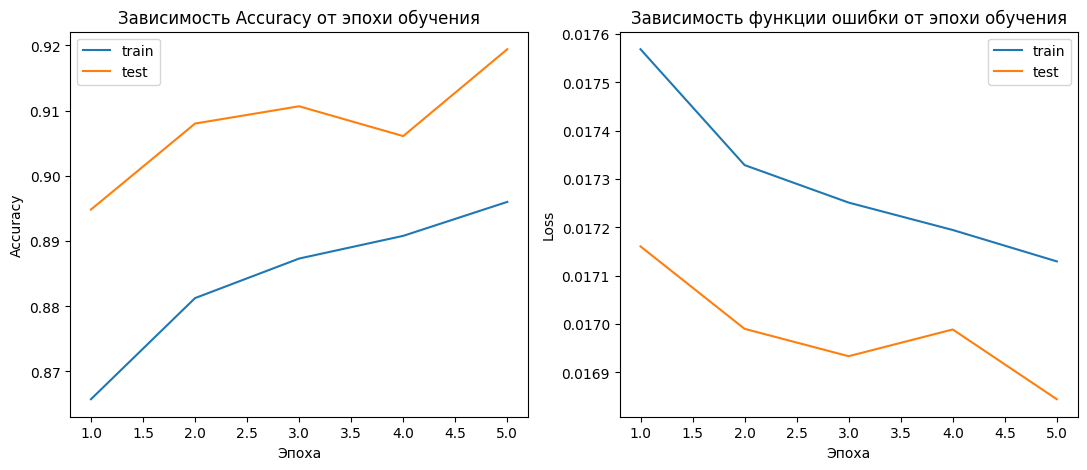

In [799]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].plot(np.arange(1, n_epochs+1), all_train_accuracy, label='train')
ax[0].plot(np.arange(1, n_epochs+1), all_test_accuracy, label='test')
ax[0].set_title('Зависимость Accuracy от эпохи обучения')
ax[0].set_xlabel('Эпоха')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(np.arange(1, n_epochs+1), all_train_loss, label='train')
ax[1].plot(np.arange(1, n_epochs+1), all_test_loss, label='test')
ax[1].set_title('Зависимость функции ошибки от эпохи обучения')
ax[1].set_xlabel('Эпоха')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.savefig('metrics.png')

In [777]:
df_test = pd.read_csv('/kaggle/input/dataset/test.csv')

In [778]:
df_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [779]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [780]:
ids = df_test['id']


In [781]:
ids

0        58645
1        58646
2        58647
3        58648
4        58649
         ...  
39093    97738
39094    97739
39095    97740
39096    97741
39097    97742
Name: id, Length: 39098, dtype: int64

In [782]:
df_test = df_test.drop(columns=['id'], axis=1)

In [783]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [784]:
df_test_num = df_test.select_dtypes(include='number')
df_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,23,69000,3.0,25000,15.76,0.36,2
1,26,96000,6.0,10000,12.68,0.10,4
2,26,30000,5.0,4000,17.19,0.13,2
3,33,50000,4.0,7000,8.90,0.14,7
4,26,102000,8.0,15000,16.32,0.15,4
...,...,...,...,...,...,...,...
39093,22,31200,2.0,3000,10.37,0.10,4
39094,22,48000,6.0,7000,6.03,0.15,3
39095,51,60000,0.0,15000,7.51,0.25,25
39096,22,36000,4.0,14000,15.62,0.39,4


In [785]:
df_test_cat = df_test.select_dtypes(include='object')
df_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,HOMEIMPROVEMENT,F,N
1,MORTGAGE,PERSONAL,C,Y
2,RENT,VENTURE,E,Y
3,RENT,DEBTCONSOLIDATION,A,N
4,MORTGAGE,HOMEIMPROVEMENT,D,Y
...,...,...,...,...
39093,MORTGAGE,DEBTCONSOLIDATION,B,N
39094,MORTGAGE,EDUCATION,A,N
39095,MORTGAGE,PERSONAL,A,N
39096,MORTGAGE,PERSONAL,D,Y


In [786]:
ohe = OneHotEncoder()
codes = ohe.fit_transform(df_test_cat).toarray()
feature_names = ohe.get_feature_names_out(df_test_cat.columns)
df_test_cat = pd.DataFrame(codes, columns=feature_names)
df_test_cat

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [787]:
data_test = pd.concat([df_test_num, df_test_cat], axis=1)

In [788]:

data_test = data_test.drop(columns=['cb_person_cred_hist_length'], axis=1)
data_test = data_test.drop(columns=['loan_grade_A'], axis=1)
data_test = data_test.drop(columns=['person_home_ownership_MORTGAGE'], axis=1)
data_test = data_test.drop(columns=['cb_person_default_on_file_N'], axis=1)

In [789]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     39098 non-null  int64  
 1   person_income                  39098 non-null  int64  
 2   person_emp_length              39098 non-null  float64
 3   loan_amnt                      39098 non-null  int64  
 4   loan_int_rate                  39098 non-null  float64
 5   loan_percent_income            39098 non-null  float64
 6   person_home_ownership_OTHER    39098 non-null  float64
 7   person_home_ownership_OWN      39098 non-null  float64
 8   person_home_ownership_RENT     39098 non-null  float64
 9   loan_intent_DEBTCONSOLIDATION  39098 non-null  float64
 10  loan_intent_EDUCATION          39098 non-null  float64
 11  loan_intent_HOMEIMPROVEMENT    39098 non-null  float64
 12  loan_intent_MEDICAL            39098 non-null 

In [790]:
scaler = StandardScaler()
data_test = scaler.fit_transform(data_test)


In [791]:
data_test

array([[-0.75700653,  0.13014081, -0.43612143, ..., 19.27075257,
        -0.02146145, -0.42034944],
       [-0.25971541,  0.8415031 ,  0.33940391, ..., -0.05189211,
        -0.02146145,  2.37897307],
       [-0.25971541, -0.8973825 ,  0.08089546, ..., -0.05189211,
        -0.02146145,  2.37897307],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ..., -0.05189211,
        -0.02146145, -0.42034944],
       [-0.92277024, -0.73930199, -0.17761298, ..., -0.05189211,
        -0.02146145,  2.37897307],
       [ 0.56910312, -0.50218123,  0.33940391, ..., -0.05189211,
        -0.02146145, -0.42034944]])

In [792]:
data_test_tensor = torch.tensor(data_test, dtype=torch.float32)

In [793]:
preds_test = clf.predict(data_test_tensor, proba=True)

In [794]:
submission = pd.DataFrame({
    'id': ids,
    'loan_status': preds_test.tolist()
})

In [795]:
submission['loan_status'] = submission['loan_status'].apply(lambda x: x[0])

In [796]:
submission.head(10).round(6)

,id,loan_status
0,58645,1.000000
1,58646,0.271225
2,58647,1.000000
3,58648,0.827399
4,58649,0.386073
5,58650,1.000000
6,58651,0.000006
7,58652,0.067882
8,58653,1.000000
9,58654,0.000031


In [797]:
'''
id
loan_status
58645
0.9989596180857241
58646
0.03713084027360185
58647
0.5343560798805254
58648
0.01269570928828058
58649
0.06298541615024242
58650
0.9572980279861689
58651
0.004127849100761238
58652
0.010847395804079122
58653
0.2873175993784984
58654
0.01952034297609657
'''

'\nid\nloan_status\n58645\n0.9989596180857241\n58646\n0.03713084027360185\n58647\n0.5343560798805254\n58648\n0.01269570928828058\n58649\n0.06298541615024242\n58650\n0.9572980279861689\n58651\n0.004127849100761238\n58652\n0.010847395804079122\n58653\n0.2873175993784984\n58654\n0.01952034297609657\n'

In [798]:
submission.to_csv('submission.csv', encoding='utf-8', index=False)
